Fill in the missing code (#####) to use a NN to define an SVM classifier (see links at bottom of the file). Check for questions at the bottom of the file.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import numpy as np
# from keras.layers import Dense
# from keras.models import Sequential
# from keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
# import keras
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

from sklearn.model_selection import GridSearchCV

In [3]:
num_features = 20
# generate regression dataset
X, y = make_regression(n_samples=4000, n_features=num_features, noise=0.1, random_state=1)

# split into train and test
n_train = 2000
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# reshape 1d arrays to 2d arrays
trainy = trainy.reshape(len(trainy), 1)
testy = testy.reshape(len(trainy), 1)

# create scaler
scaler = StandardScaler()
# fit scaler on training dataset
scaler.fit(trainy)
# transform training dataset
trainy = scaler.transform(trainy)
# transform test dataset
testy = scaler.transform(testy)

# fit scaler on training dataset
scaler.fit(trainX)
# transform training dataset
trainX = scaler.transform(trainX)
# transform test dataset
testX = scaler.transform(testX)

In [4]:
df = pd.DataFrame(trainy, columns=['y'])
df['lab']=np.where(df.y.shift(-1)>df.y,1,0) #like price prediction
trainy=df.lab.fillna(0).values
df = pd.DataFrame(testy, columns=['y'])
df['lab']=np.where(df.y.shift(-1)>df.y,1,0) #like price prediction
testy=df.lab.fillna(0).values

In [6]:
# Using the link (#1) at the bottom, program the SVM classifier with scaled inputs outputs on the regression problem.
#Note that once you wrap the neural net with the scikit-learn KerasClassifier wrapper,
#you can use scikit-learn's parameter search to optimize the neural net parameters. 
#Here the grid search chooses the best optimizer. For more info, see link (#2) at the bottom.

from tensorflow.keras.regularizers import l2

#TODO: finish create_model function
def create_model(optimizer='Adam'):
    model = Sequential()
    model.add(Dense(input_dim=20, units=64, activation='relu'))  # input layer
    model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=l2(0.01)))  # output layer with L2 regularization
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=1)

# define the grid search hyper parameter options and dictionary
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)

#create the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(trainX, trainy)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/Users/stevey/cpsc330arm/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/stevey/cpsc330arm/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-09 17:28:33.020178: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-07-09 17:28:33.021042: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-07-09 17:28:33.021102: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-07-09 17:28:33.022353: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.

Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100


2025-07-09 17:28:36.960848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-07-09 17:28:36.965062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-07-09 17:28:36.967510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-07-09 17:28:36.992972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-07-09 17:28:36.993583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-07-09 17:28:37.021762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-07-09 17:28:37.046442: I tensorflow/core/grappler/optimizers/cust

42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.5682 - loss: 0.7517
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.5077 - loss: 0.8388
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.5849 - loss: 0.7131
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.5033 - loss: 0.7612
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.5475 - loss: 0.7237
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5599 - loss: 0.7484Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.5612 - loss: 0.7470
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.5599 - loss: 0.7210
 3/42 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8160 - loss: 0.5362Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.5423 - loss: 0.7649
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7290 - loss: 0.5741
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7427 - loss: 0.5553
Epoch 

/Users/stevey/cpsc330arm/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/stevey/cpsc330arm/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7740 - loss: 0.4655
37/42 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7755 - loss: 0.4743Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7757 - loss: 0.4759
Epoch 100/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/stepp - accuracy: 0.7910 - loss: 0.50
20/42 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8153 - loss: 0.4613

/Users/stevey/cpsc330arm/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/stevey/cpsc330arm/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/stevey/cpsc330arm/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/stevey/cpsc330arm/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument

23/42 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8131 - loss: 0.4618Epoch 1/100
26/42 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8116 - loss: 0.4616Epoch 1/100
28/42 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8108 - loss: 0.4615Epoch 1/100
Epoch 1/100
34/42 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8079 - loss: 0.4621

/Users/stevey/cpsc330arm/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/stevey/cpsc330arm/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8044 - loss: 0.4643Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8026 - loss: 0.4656


/Users/stevey/cpsc330arm/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/stevey/cpsc330arm/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 9/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
28/42 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5300 - loss: 0.7229

/Users/stevey/cpsc330arm/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/stevey/cpsc330arm/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5480 - loss: 0.7371Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.5810 - loss: 0.7173
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5693 - loss: 0.7331
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5636 - loss: 0.7237
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5530 - loss: 0.7053
 1/42 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6250 - loss: 0.6133Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4568 - loss: 0.9009
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5024 - loss: 0.8418
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7360 - loss: 0.5654
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7417 - loss: 0.5609
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7511 - loss: 0.5534
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7270 - loss: 0

/Users/stevey/cpsc330arm/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/stevey/cpsc330arm/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/stevey/cpsc330arm/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/stevey/cpsc330arm/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument

13/42 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7758 - loss: 0.4643Epoch 1/100
 6/42 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.7130 - loss: 0.5130Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7872 - loss: 0.4637
Epoch 100/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7628 - loss: 0.4874
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7838 - loss: 0.4766
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7509 - loss: 0.5116
Epoch 100/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7801 - loss: 0.4740
Epoch 100/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/stepp - accuracy: 0.7715 - loss: 0.4729
22/42 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7742 - loss: 0.4851

/Users/stevey/cpsc330arm/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/stevey/cpsc330arm/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/stevey/cpsc330arm/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/stevey/cpsc330arm/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/stepp - accuracy: 0.7726 - loss: 0.487
27/42 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7710 - loss: 0.4858Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7732 - loss: 0.4766
Epoch 97/100
18/42 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7917 - loss: 0.4598Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7700 - loss: 0.4839
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7872 - loss: 0.4713
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7789 - loss: 0.480
 1/42 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9688 - loss: 0.2652ss: 0.4783

/Users/stevey/cpsc330arm/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/stevey/cpsc330arm/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 3/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8611 - loss: 0.3679Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7783 - loss: 0.4777
Epoch 98/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/stepcy: 0.5391 - loss: 0.797ss: 0.4451
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7742 - loss: 0.4853
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7876 - loss: 0.4674
Epoch 99/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5442 - loss: 0.7673
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/stepacy: 0.7812 - loss: 0.
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5395 - loss: 0.7427
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7739 - loss: 0.4593
Epoch 100/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7343 - loss: 0.5826
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.4038 - loss: 0.8830
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6868 - loss: 0.5943
Epoch 3/100
42/42 ━━━━━━━━

/Users/stevey/cpsc330arm/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/stevey/cpsc330arm/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


2025-07-09 17:34:09.541337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5788 - loss: 0.7323
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7693 - loss: 0.5240
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7636 - loss: 0.5116
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7726 - loss: 0.5130
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7741 - loss: 0.4926
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7662 - loss: 0.4965
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7795 - loss: 0.4946
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7907 - loss: 0.4891
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7492 - loss: 0.5130
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7682 - loss: 0.4983
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7726 - loss: 0.4998
Epoch 12/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7822 - 

Redefine the model using the best optimizer from above

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5410 - loss: 1.0253 - val_accuracy: 0.6760 - val_loss: 0.6957
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7188 - loss: 0.6037 - val_accuracy: 0.7250 - val_loss: 0.6064
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7293 - loss: 0.5777 - val_accuracy: 0.7255 - val_loss: 0.6004
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7432 - loss: 0.5546 - val_accuracy: 0.7295 - val_loss: 0.5997
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7557 - loss: 0.5509 - val_accuracy: 0.7275 - val_loss: 0.6014
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7536 - loss: 0.5561 - val_accuracy: 0.7295 - val_loss: 0.6007
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7510 - loss: 0.5540 - val_accuracy: 0.7310 - val_loss: 0.5989
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7405 - loss: 0.5702 - val_accuracy: 0.

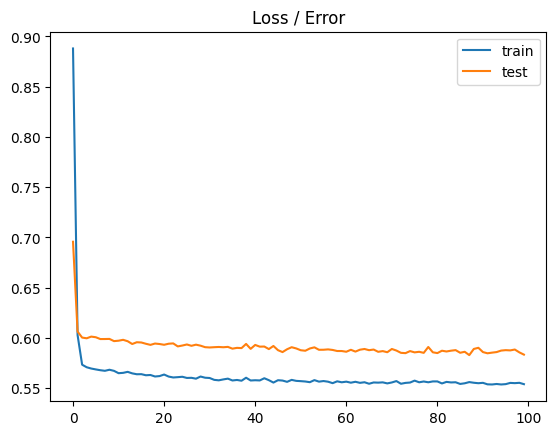

In [9]:
# define model
model = Sequential()
model.add(Dense(input_dim=20, units=64, activation='relu'))
model.add(Dense(units=1, activation='linear', kernel_regularizer=l2(0.01)))
#compile the model
model.compile(loss='hinge', optimizer=grid_result.best_params_['optimizer'], metrics=['accuracy'])
#fit the model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=1)
# evaluate the model
train_e = model.evaluate(trainX, trainy, verbose=1)
test_e = model.evaluate(testX, testy, verbose=1)
print('Train loss: %.3f, Test loss: %.3f' % (train_e[0], test_e[0])) 
print('Train metric: %.3f, Test metric: %.3f' % (train_e[1], test_e[1])) 
#plot loss during training
plt.title('Loss / Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

References:
1. https://archive.md/sanjs
2. https://archive.md/lOvhL

Can you program a simple tree with Keras Tensorflow?